# Comparing EOB and PN Phenom waveform approximants for Aligned spin bank of mass 5-50 solar masses 
SEOBNRv4HM_ROM vs IMRPhenomXHM  

In [2]:
with open("banksim.ini", 'a') as fout:
    fout.write("""\
[inspinj]
f-lower = 15 
i-distr = fixed
fixed-inc = 0
m-distr = totalMassRatio 
disable-milkyway =
min-mratio = 1. 
max-mratio = 10. 
min-distance = 1000  
l-distr = random  
min-mtotal = 10
waveform = SEOBNRv4HM_ROM
enable-spin =
aligned = 
max-mtotal = 100
min-spin1 = 0 
max-spin1 = 0.95
min-spin2 = 0 
max-spin2 = 0.95
max-distance = 1000 
d-distr = uniform 
gps-start-time = 1000000000 
gps-end-time =   1000010000
time-interval = 0. 
time-step = 1. 
seed = 3 

[executables]
banksim = /cvmfs/oasis.opensciencegrid.org/ligo/sw/pycbc/x86_64_rhel_7/virtualenv/pycbc-v1.18.0/bin/pycbc_banksim

[workflow]
accounting-group = ligo.dev.o3.cbc.explore.test
log-path = /home/isha.anantpurkar/FinalAlignedSpinBank/WaveformComparisons/HigherModes/logs
;use-gpus =
bank-file = AlignedSpinGeomfaster5_50.xml
injections-per-job = 50
templates-per-job = 500 

[banksim]
psd-model = aLIGOZeroDetHighPower 
template-approximant = IMRPhenomXHM 
; template-phase-order = 7 
; template-amplitude-order = 0 
; template-spin-order = 7
template-start-frequency = 20
template-sample-rate = 16384
signal-approximant = SEOBNRv4HM_ROM
; signal-phase-order = 7 
; signal-amplitude-order = 0 
; signal-spin-order = 7
signal-sample-rate = 16384
signal-start-frequency = 20
filter-low-frequency = 20
filter-sample-rate = 4096
filter-signal-length = 256
mchirp-window = 0.10
""")

In [47]:
! tail -n10 banksim.dag.dagman.out

05/11/21 22:38:41 DAG status: 2 (DAG_STATUS_NODE_FAILED)
05/11/21 22:38:41 Of 2876 nodes total:
05/11/21 22:38:41  Done     Pre   Queued    Post   Ready   Un-Ready   Failed
05/11/21 22:38:41   ===     ===      ===     ===     ===        ===      ===
05/11/21 22:38:41  2801       0        0       0       0         19       56
05/11/21 22:38:41 0 job proc(s) currently held
05/11/21 22:38:41 DAGMan Runtime Statistics: [ EventCycleTimeAvg = 0.485832100822812; EventCycleTimeCount = 21.0; EventCycleTimeMax = 5.460223913192749; EventCycleTimeMin = 0.0001671314239501953; EventCycleTimeStd = 1.534958756361269; EventCycleTimeSum = 10.20247411727905; LogProcessCycleTimeAvg = 0.001796078681945801; LogProcessCycleTimeCount = 10.0; LogProcessCycleTimeMax = 0.004975080490112305; LogProcessCycleTimeMin = 0.0001318454742431641; LogProcessCycleTimeStd = 0.00187232050697469; LogProcessCycleTimeSum = 0.01796078681945801; SleepCycleTimeAvg = 5.004786559513637; SleepCycleTimeCount = 21.0; SleepCycleTimeMax 

In [51]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pycbc import pnutils
import numpy as np
import pylab
from pycbc import conversions

In [52]:
res = np.loadtxt("results.dat")
match = res[:,0]

tmass1 = res[:,1]
tmass2 = res[:,2]
tspin1x = res[:,3]
tspin1y = res[:,4]
tspin1z = res[:,5]
tspin2x = res[:,6]
tspin2y = res[:,7]
tspin2z = res[:,8]
tmchirp, teta = pnutils.mass1_mass2_to_mchirp_eta(tmass1, tmass2)

imass1 = res[:,9]
imass2 = res[:,10]
ispin1x = res[:,11]
ispin1y = res[:,12]
ispin1z = res[:,13]
ispin2x = res[:,14]
ispin2y = res[:,15]
ispin2z = res[:,16]
imchirp, ieta = pnutils.mass1_mass2_to_mchirp_eta(imass1, imass2)

q = np.maximum(imass1/imass2, imass2/imass1)
s1m = (ispin1x**2+ispin1y**2+ispin1z**2)**0.5
s2m = (ispin2x**2+ispin2y**2+ispin2z**2)**0.5

(array([0.00170455, 0.00204545, 0.00318182, 0.00397727, 0.00840909,
        0.02204545, 0.05602273, 0.07340909, 0.08840909, 1.        ]),
 array([0.      , 0.099981, 0.199962, 0.299943, 0.399924, 0.499905,
        0.599886, 0.699867, 0.799848, 0.899829, 0.99981 ]),
 <a list of 10 Patch objects>)

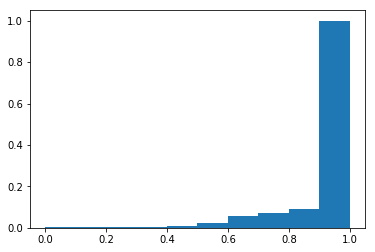

In [53]:
plt.hist(match, cumulative=True, density=True)

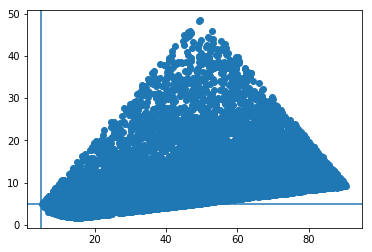

In [54]:
plt.scatter(imass1, imass2)
plt.axhline(5)
plt.axvline(5)

In [55]:
indices = []
for i in range(len(imass2)):
    if imass2[i]<5.0:
        indices.append(i)
        
match_new=np.delete(match, indices)

tmass1_new = np.delete(tmass1, indices) 
tmass2_new = np.delete(tmass2, indices)
tspin1x_new = np.delete(tspin1x , indices)
tspin1y_new = np.delete(tspin1y , indices)
tspin1z_new = np.delete(tspin1z , indices)
tspin2x_new = np.delete(tspin2x , indices)
tspin2y_new = np.delete(tspin2y , indices)
tspin2z_new = np.delete(tspin2z , indices)
tmchirp_new = np.delete(tmchirp, indices)
teta_new = np.delete(teta , indices)

imass1_new = np.delete(imass1, indices)
imass2_new = np.delete(imass2 , indices)
ispin1x_new = np.delete(ispin1x , indices)
ispin1y_new = np.delete(ispin1y , indices)
ispin1z_new = np.delete(ispin1z , indices)
ispin2x_new = np.delete(ispin2x , indices)
ispin2y_new = np.delete(ispin2y , indices)
ispin2z_new = np.delete(ispin2z , indices)
imchirp_new = np.delete(imchirp, indices) 
ieta_new = np.delete(ieta, indices)
q_new = np.delete(q, indices)
s1m_new = np.delete(s1m , indices)
s2m_new = np.delete(s2m , indices)

(array([0.00170261, 0.00979001, 0.02312713, 0.02866061, 0.03305902,
        0.0368899 , 0.04100454, 0.04554484, 0.111521  , 1.        ]),
 array([0.55088 , 0.595773, 0.640666, 0.685559, 0.730452, 0.775345,
        0.820238, 0.865131, 0.910024, 0.954917, 0.99981 ]),
 <a list of 10 Patch objects>)

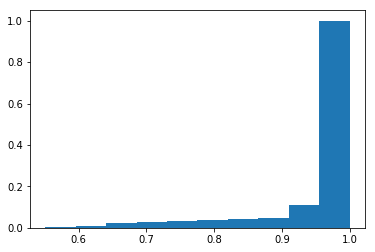

In [56]:
plt.hist(match_new, cumulative=True, density=True)

Text(0.5,1,'Comparing EOB and Phenom aligned spin waveforms HM')

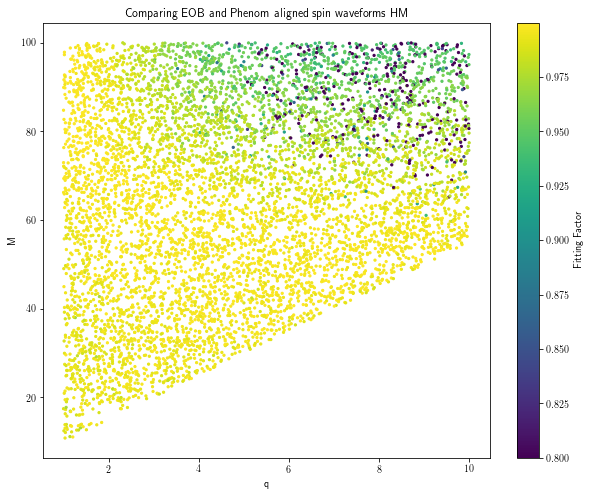

In [60]:
from matplotlib import rc
rc('text', usetex=True)

plt.figure(figsize = (10,8))
plt.scatter( q_new,imass1_new + imass2_new, s=5 ,c = match_new, vmin=0.80)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("q")
plt.ylabel("M")
#plt.xlim([1,8])
plt.title("Comparing EOB and Phenom aligned spin waveforms HM")

Text(0.5,1,'Comparing SEOBNRv4ROMHM and IMRPHENOMXHM aligned spin waveforms')

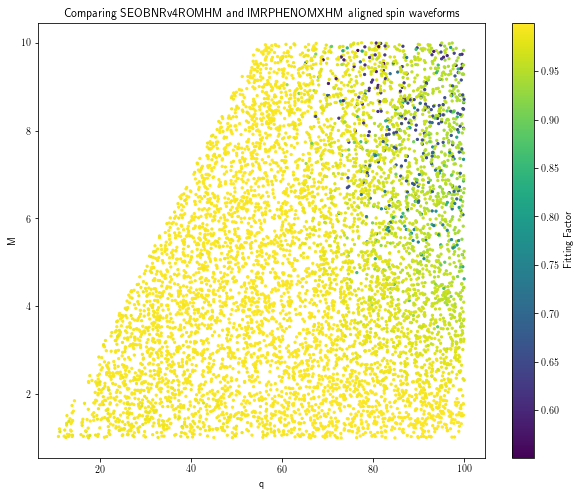

In [61]:
plt.figure(figsize = (10,8))
plt.scatter(imass1_new + imass2_new, q_new, s=5 ,c = match_new)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("q")
plt.ylabel("M")
#plt.xlim([1,8])
plt.title("Comparing SEOBNRv4ROMHM and IMRPHENOMXHM aligned spin waveforms")

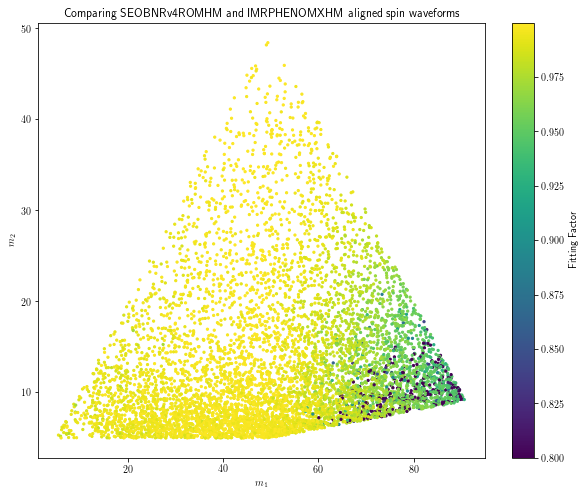

In [62]:
plt.figure(figsize = (10,8))
plt.scatter(imass1_new,imass2_new, s=5 ,c = match_new, vmin=0.80)
#plt.plot(tq, tsigma, 'kx', alpha=0.05)
plt.colorbar(label="Fitting Factor")
plt.xlabel("$m_1$")
plt.ylabel("$m_2$")
#plt.xlim([1,8])
plt.title("Comparing SEOBNRv4ROMHM and IMRPHENOMXHM aligned spin waveforms")
plt.savefig("AlignedSpinWaveformComparisonsQuadrupolem1m2.png")